In [1]:
!pip install seaborn

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
#Transfers data to lists
df = pd.read_csv('Datasets/output_1.csv')

#gets all names of collums 
top = list(df.columns)

#collums to iterate throught
count = len(top)

#change all types after 'words' to numeric value for charts
for i in range(1,count):
    df[top[i]] = df[top[i]].astype(float)
    
#how to sort 
highest_count = df.sort_values(by=top[1], ascending=False)
 

# document-1: Concept drift and machine learning model for detecting.txt

tf1 = df.sort_values(by=top[3], ascending=False)
tf1Subset = tf1.iloc[0:50, 0:1]
set1 = set(tf1Subset['Words'])

# document-2: Unveiling Data Science Dynamics.txt

tf2 = df.sort_values(by=top[4], ascending=False)
tf2Subset = tf2.iloc[0:50, 0:1]
set2 = set(tf2Subset['Words'])


#symetrical difference
set3 = (set1 | set2) - (set1 & set2)


In [5]:
#--- Turning symetrical difference into a dictionary ----#

#check in the df if "word" is there
mask = df['Words'].isin(set3)

#grabs only the instance of word being shown
fill = df[mask]

#pulls the first two collums
cut = fill.iloc[: , 0:2 ]

#based on collum turn df into a dictionary
book = dict(zip(cut['Words'],cut['WordCounts']))
print(book)



{'accuracy': 445.0, 'aggregation': 89.0, 'algorithm': 606.0, 'aligned': 27.0, 'alignment': 110.0, 'also': 424.0, 'author': 75.0, 'based': 450.0, 'biology': 16.0, 'blanchette': 7.0, 'block': 261.0, 'budget': 19.0, 'calculated': 67.0, 'casual': 10.0, 'classication': 112.0, 'collected': 63.0, 'cooper': 10.0, 'cost': 142.0, 'crowd': 126.0, 'crowdower': 9.0, 'crowdsourcing': 126.0, 'data': 2297.0, 'difcult': 33.0, 'dna': 10.0, 'easy': 31.0, 'ebola': 9.0, 'educational': 12.0, 'efciency': 39.0, 'entropy': 62.0, 'error': 305.0, 'estimate': 115.0, 'exclusion': 16.0, 'false': 64.0, 'feature': 349.0, 'gain': 34.0, 'game': 100.0, 'genome': 13.0, 'highest': 33.0, 'hirth': 6.0, 'human': 467.0, 'humancomputed': 6.0, 'humancomputing': 8.0, 'improvement': 87.0, 'inclusion': 18.0, 'initial': 68.0, 'label': 260.0, 'lesson': 12.0, 'literature': 79.0, 'loss': 150.0, 'machinecomputed': 7.0, 'medium': 43.0, 'metaanalyses': 5.0, 'model': 1443.0, 'moher': 5.0, 'msa': 9.0, 'multiple': 149.0, 'multirun': 8.0, 'n

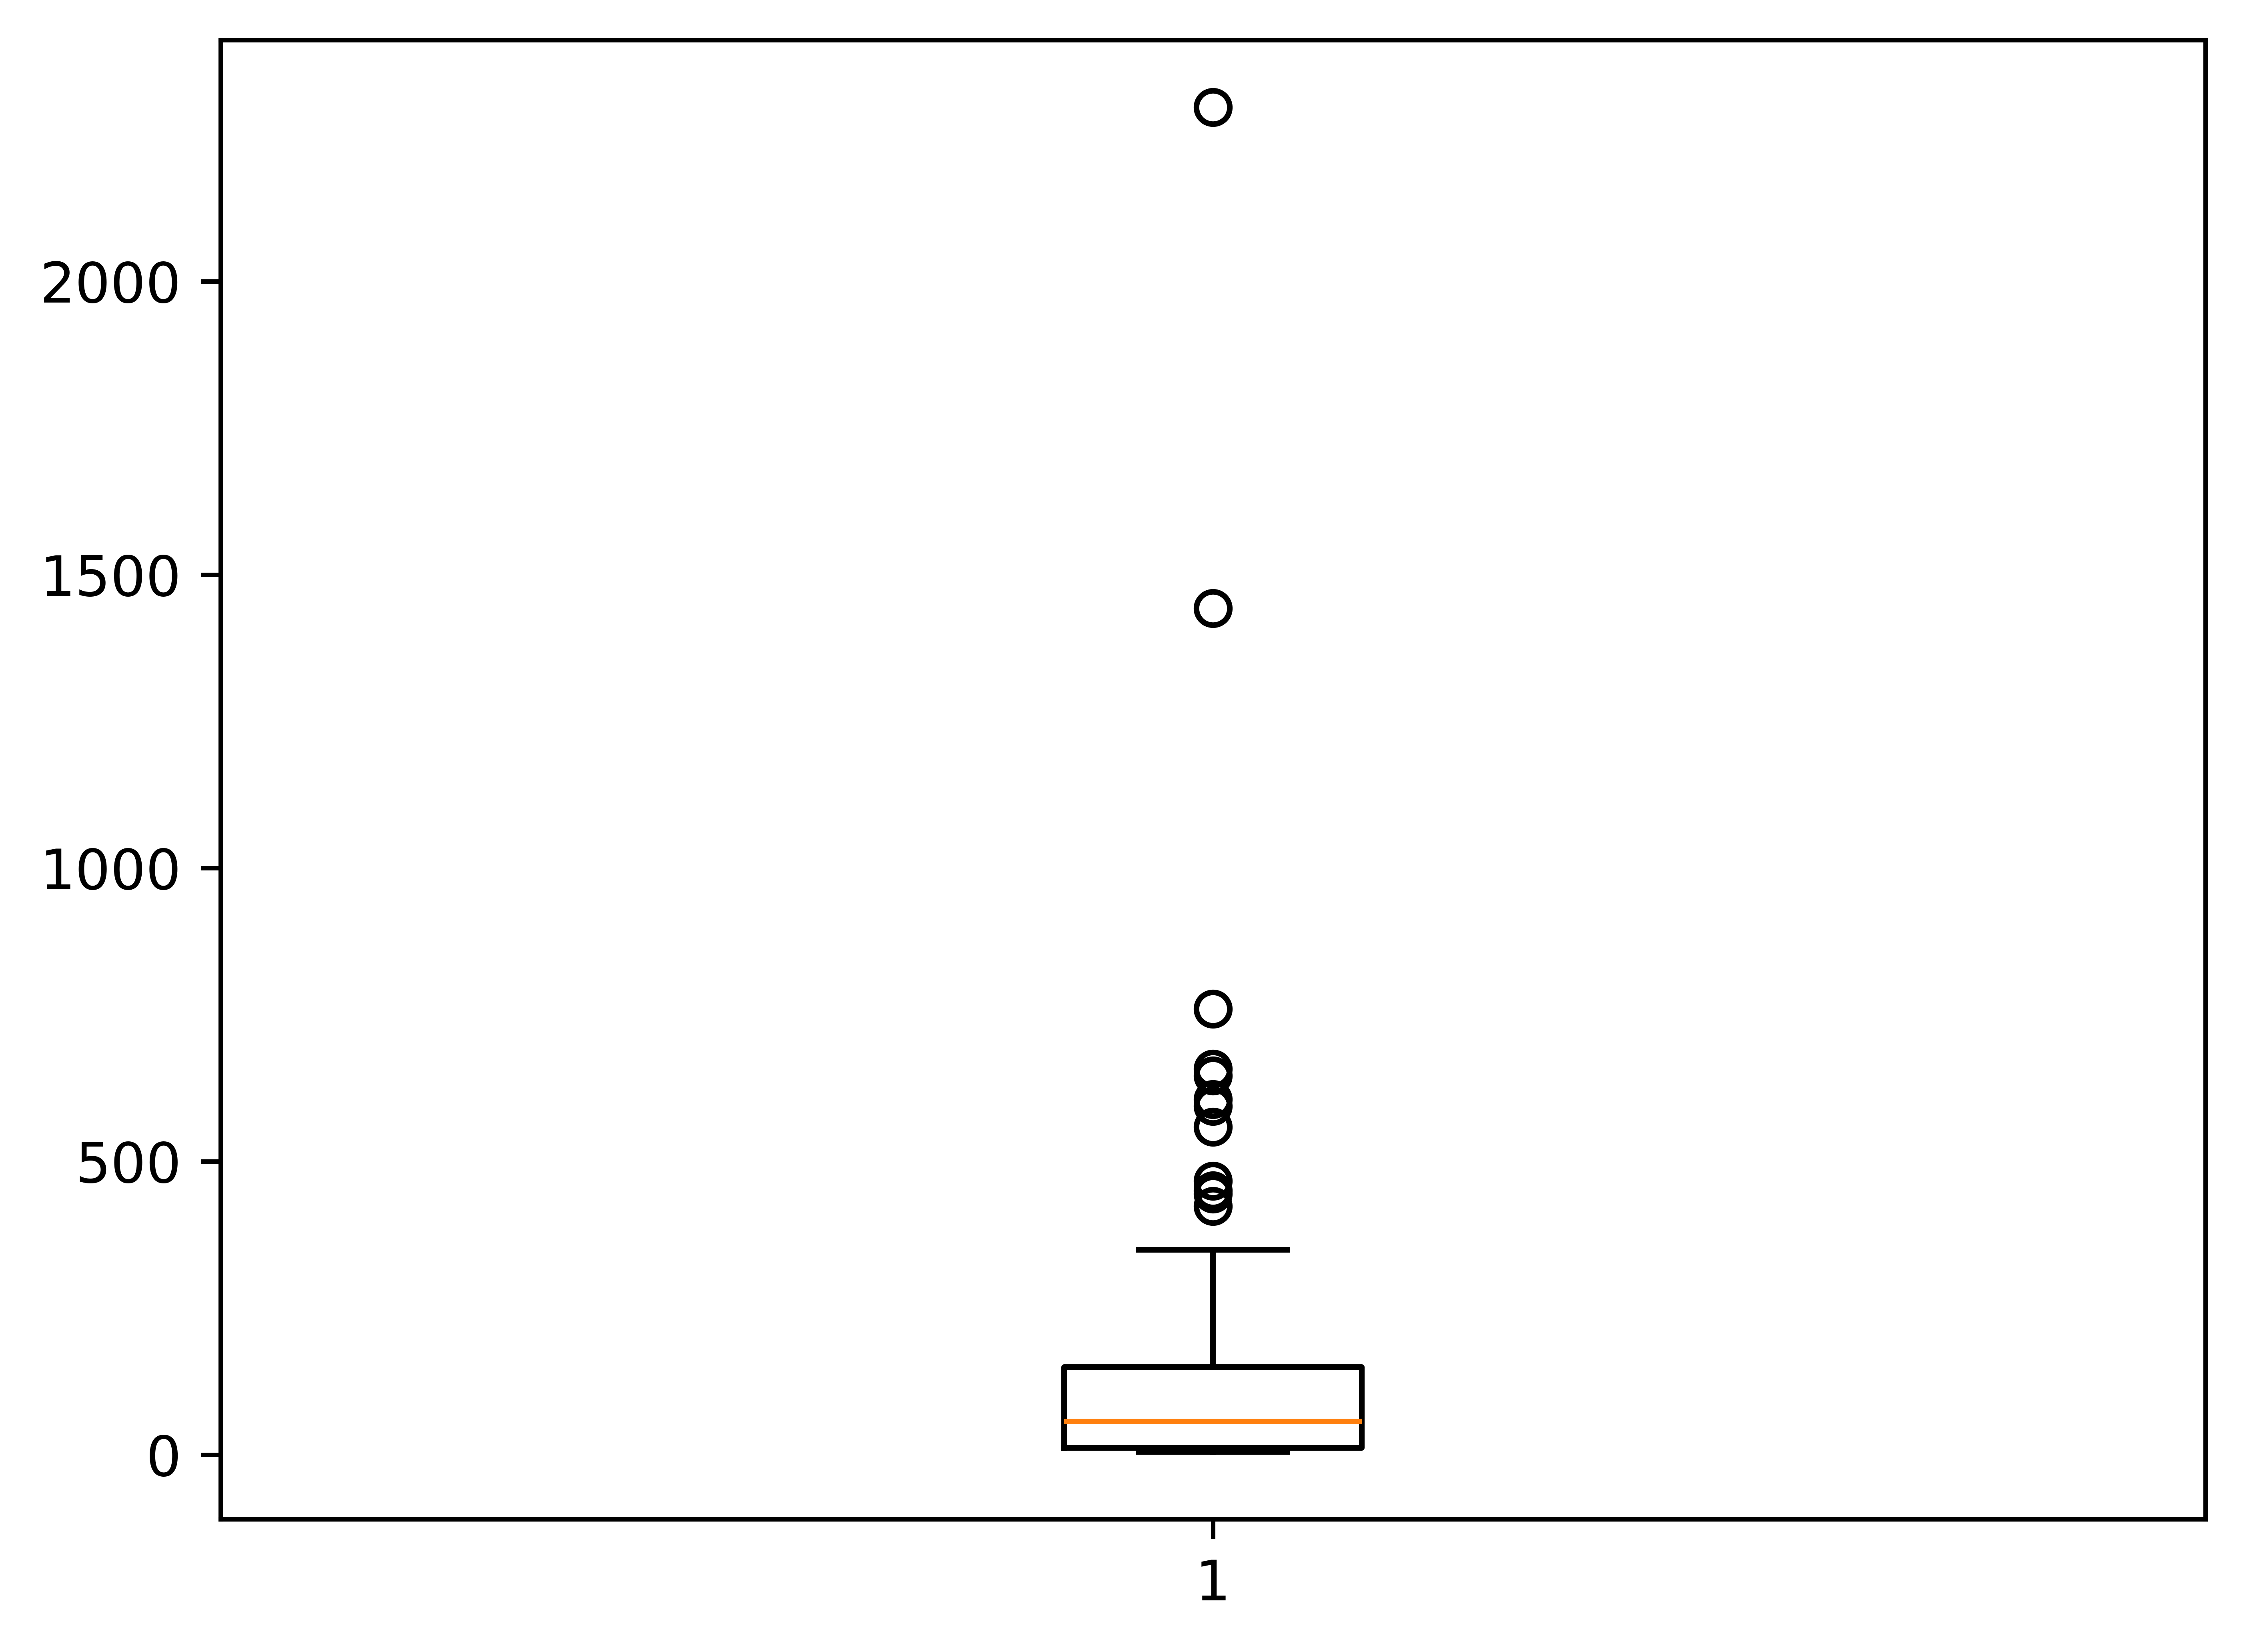

In [6]:


#-----------------------visuals-------------------#
# 3 main points for visuals to work
# call our sorted set == a
# specifc collum == x,y
# in a call x,y 

plt.rcParams['figure.dpi']=1000

#------------------box-----------------------------#

plt.boxplot(book.values())
plt.show()


In [ ]:
#------------------heatbox-------------------------#

#correlation_matrix = data.corr()
# Create the heatmap
#plt.figure(figsize = (10,10))
#sns.heatmap(data = sett, cmap = 'viridis', annot=True, fmt=".2f", square=True, linewidths=.5)
#plt.title("Top 50 words")
#plt.show()

In [7]:
#--------------------bhar--------------------------#

def barh(a,x,y):
    width = .35
    plt.barh(a[top[x]][:10], a[top[y]][:10],width, color='gray')
    plt.title("Count of Words")
    for pos in ['right', 'top']: 
        plt.gca().spines[pos].set_visible(False) 
    plt.show()
    

In [8]:
#-------------------pie-----------------------#

def pie(a,x,y):
    plt.pie(a[top[y]][:10], labels=a[top[x]][:10],
            autopct='%1.1f%%', pctdistance=0.84,
            
            wedgeprops= {
                "edgecolor":"black", 
                'linewidth': 1, 
                'antialiased': True
                }
            )
     
    centre_circle = plt.Circle((0, 0), 0.70, fc='white', edgecolor='black')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
     
    plt.title('Top Word counts')
     
    plt.show()

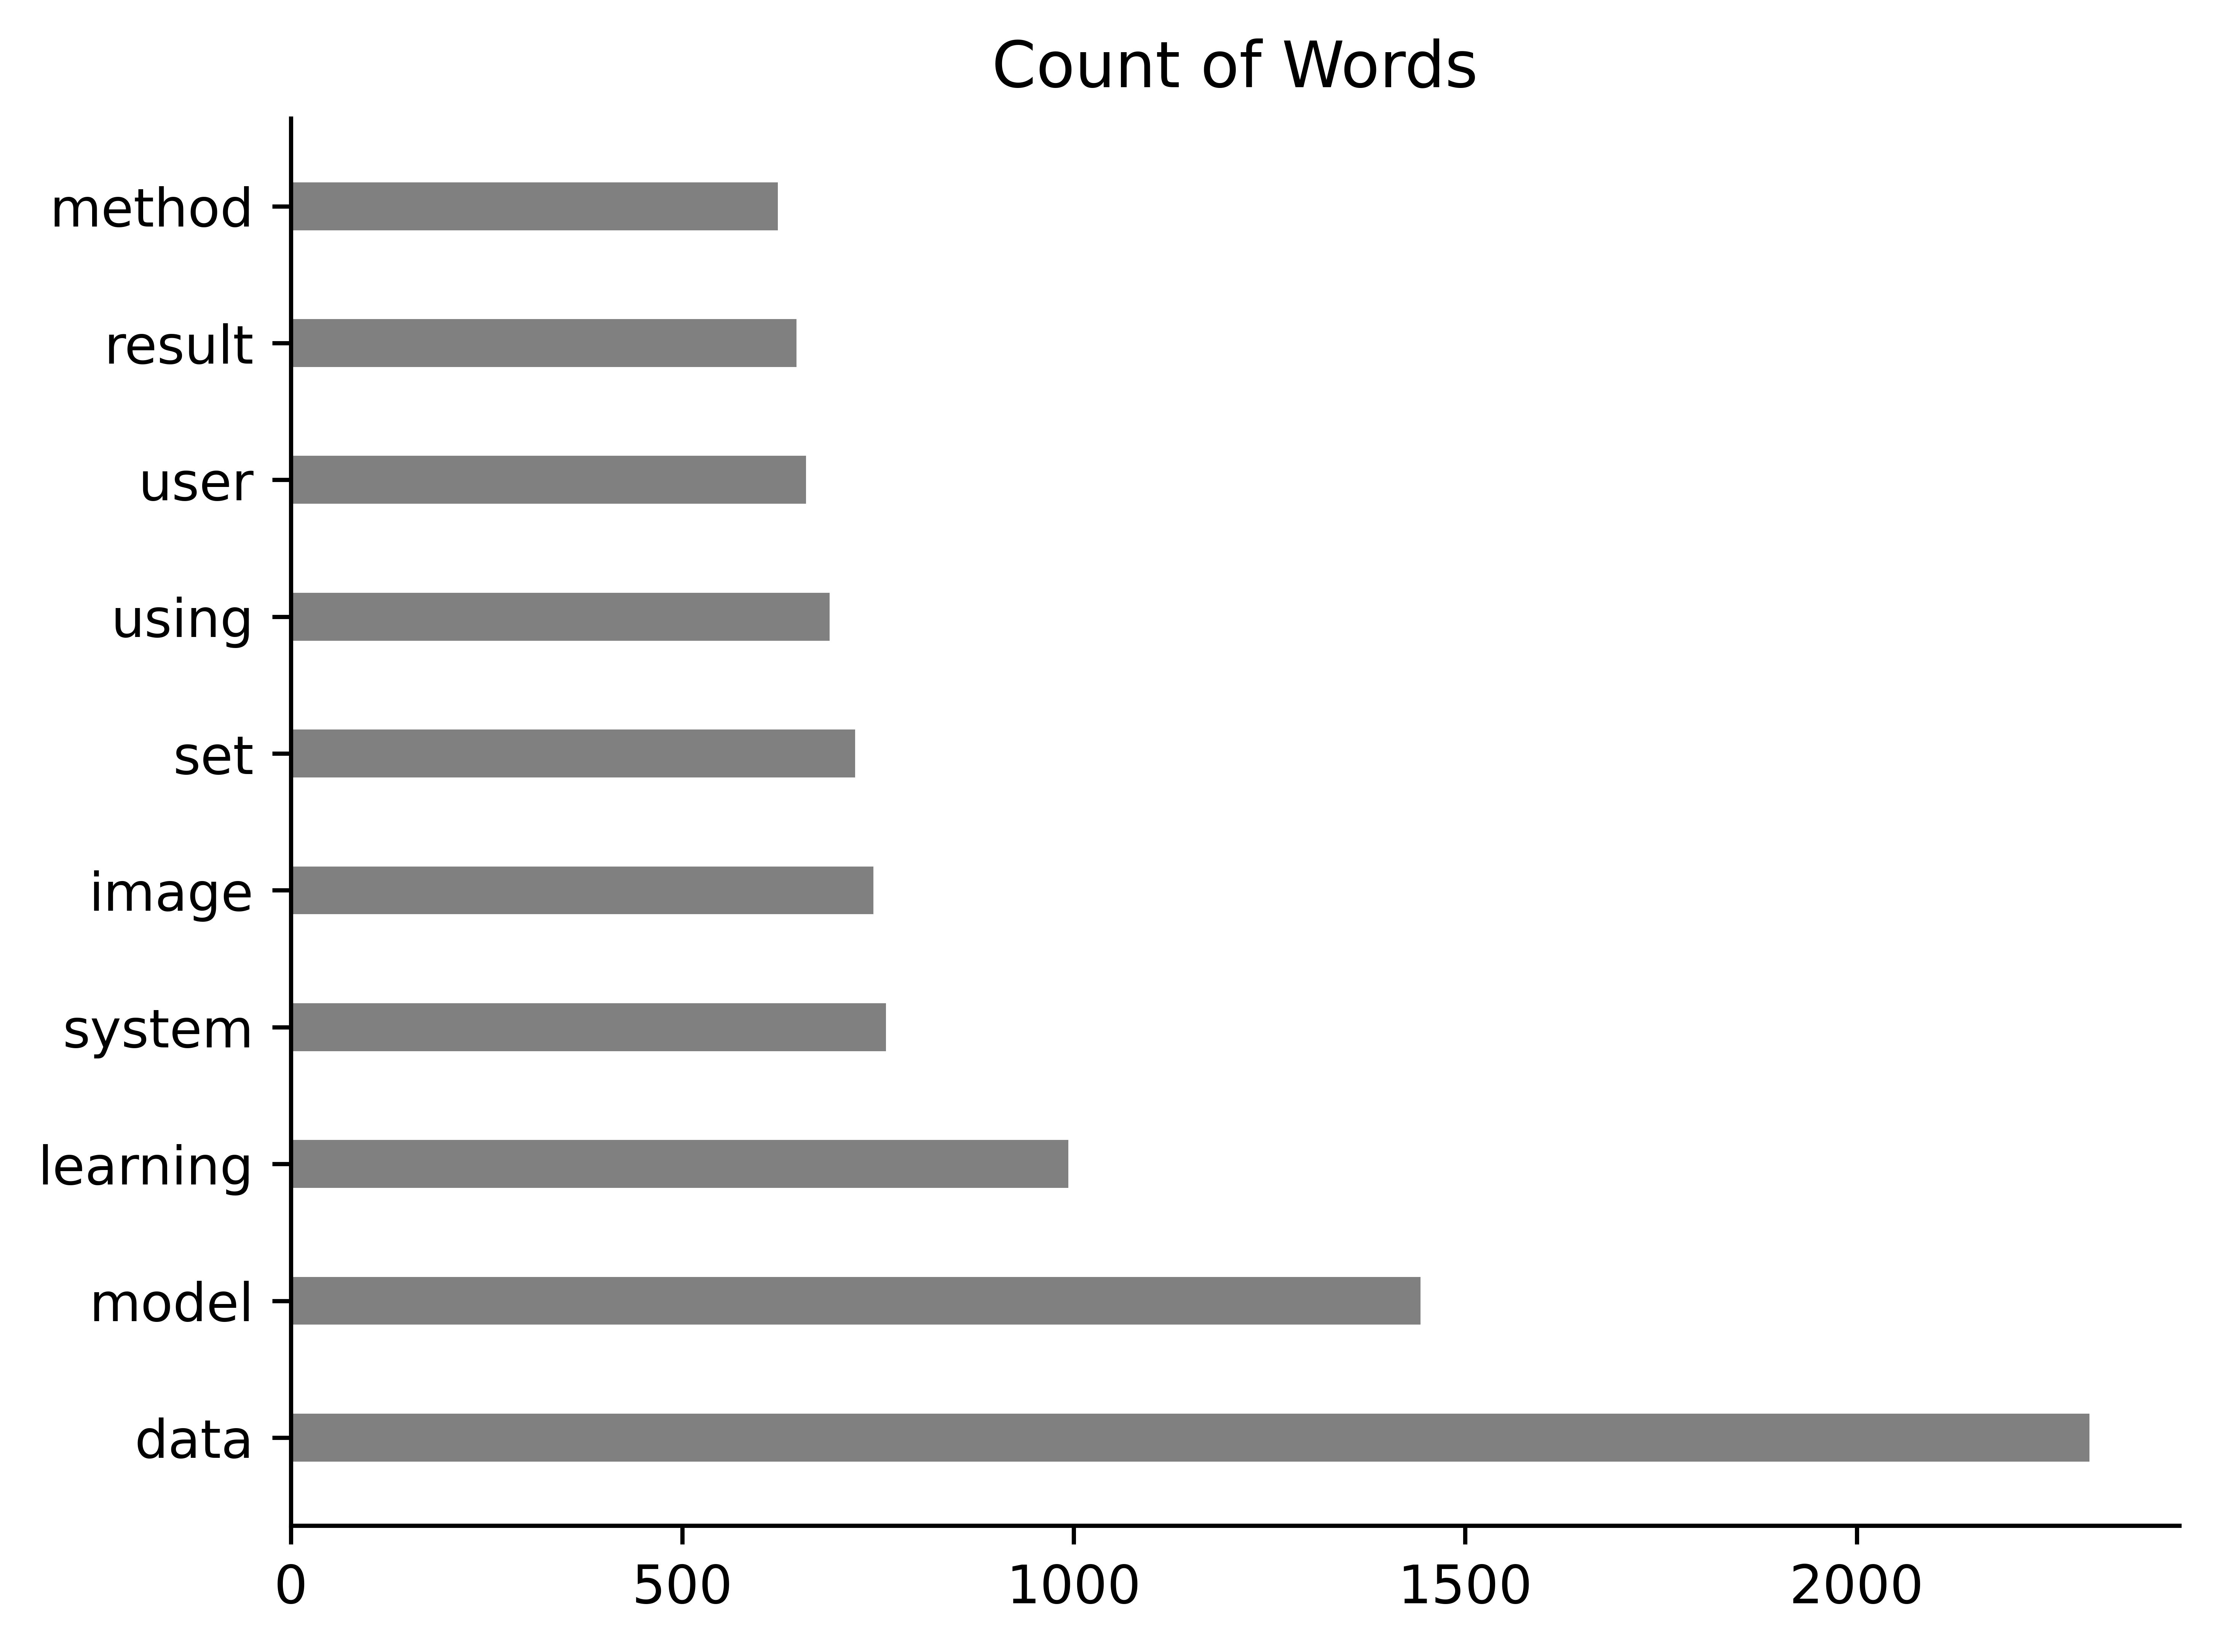

In [9]:
#----------------main-----------------------#

plt.rcParams['figure.dpi']=1000
barh(highest_count,0,1)

###
### look at union/intersection
### union - intersectio | - &
###   Smytrical difference
### ^ pull new stop words
### ^ get count of words of difference
### ^ dictionary key words vlaue counts 
### ^ retain bar/pie
### ^ replace scatter with dictionary
###
###
###
### Create heat map of the top 20 words and with there TI-IDF as the "heat"

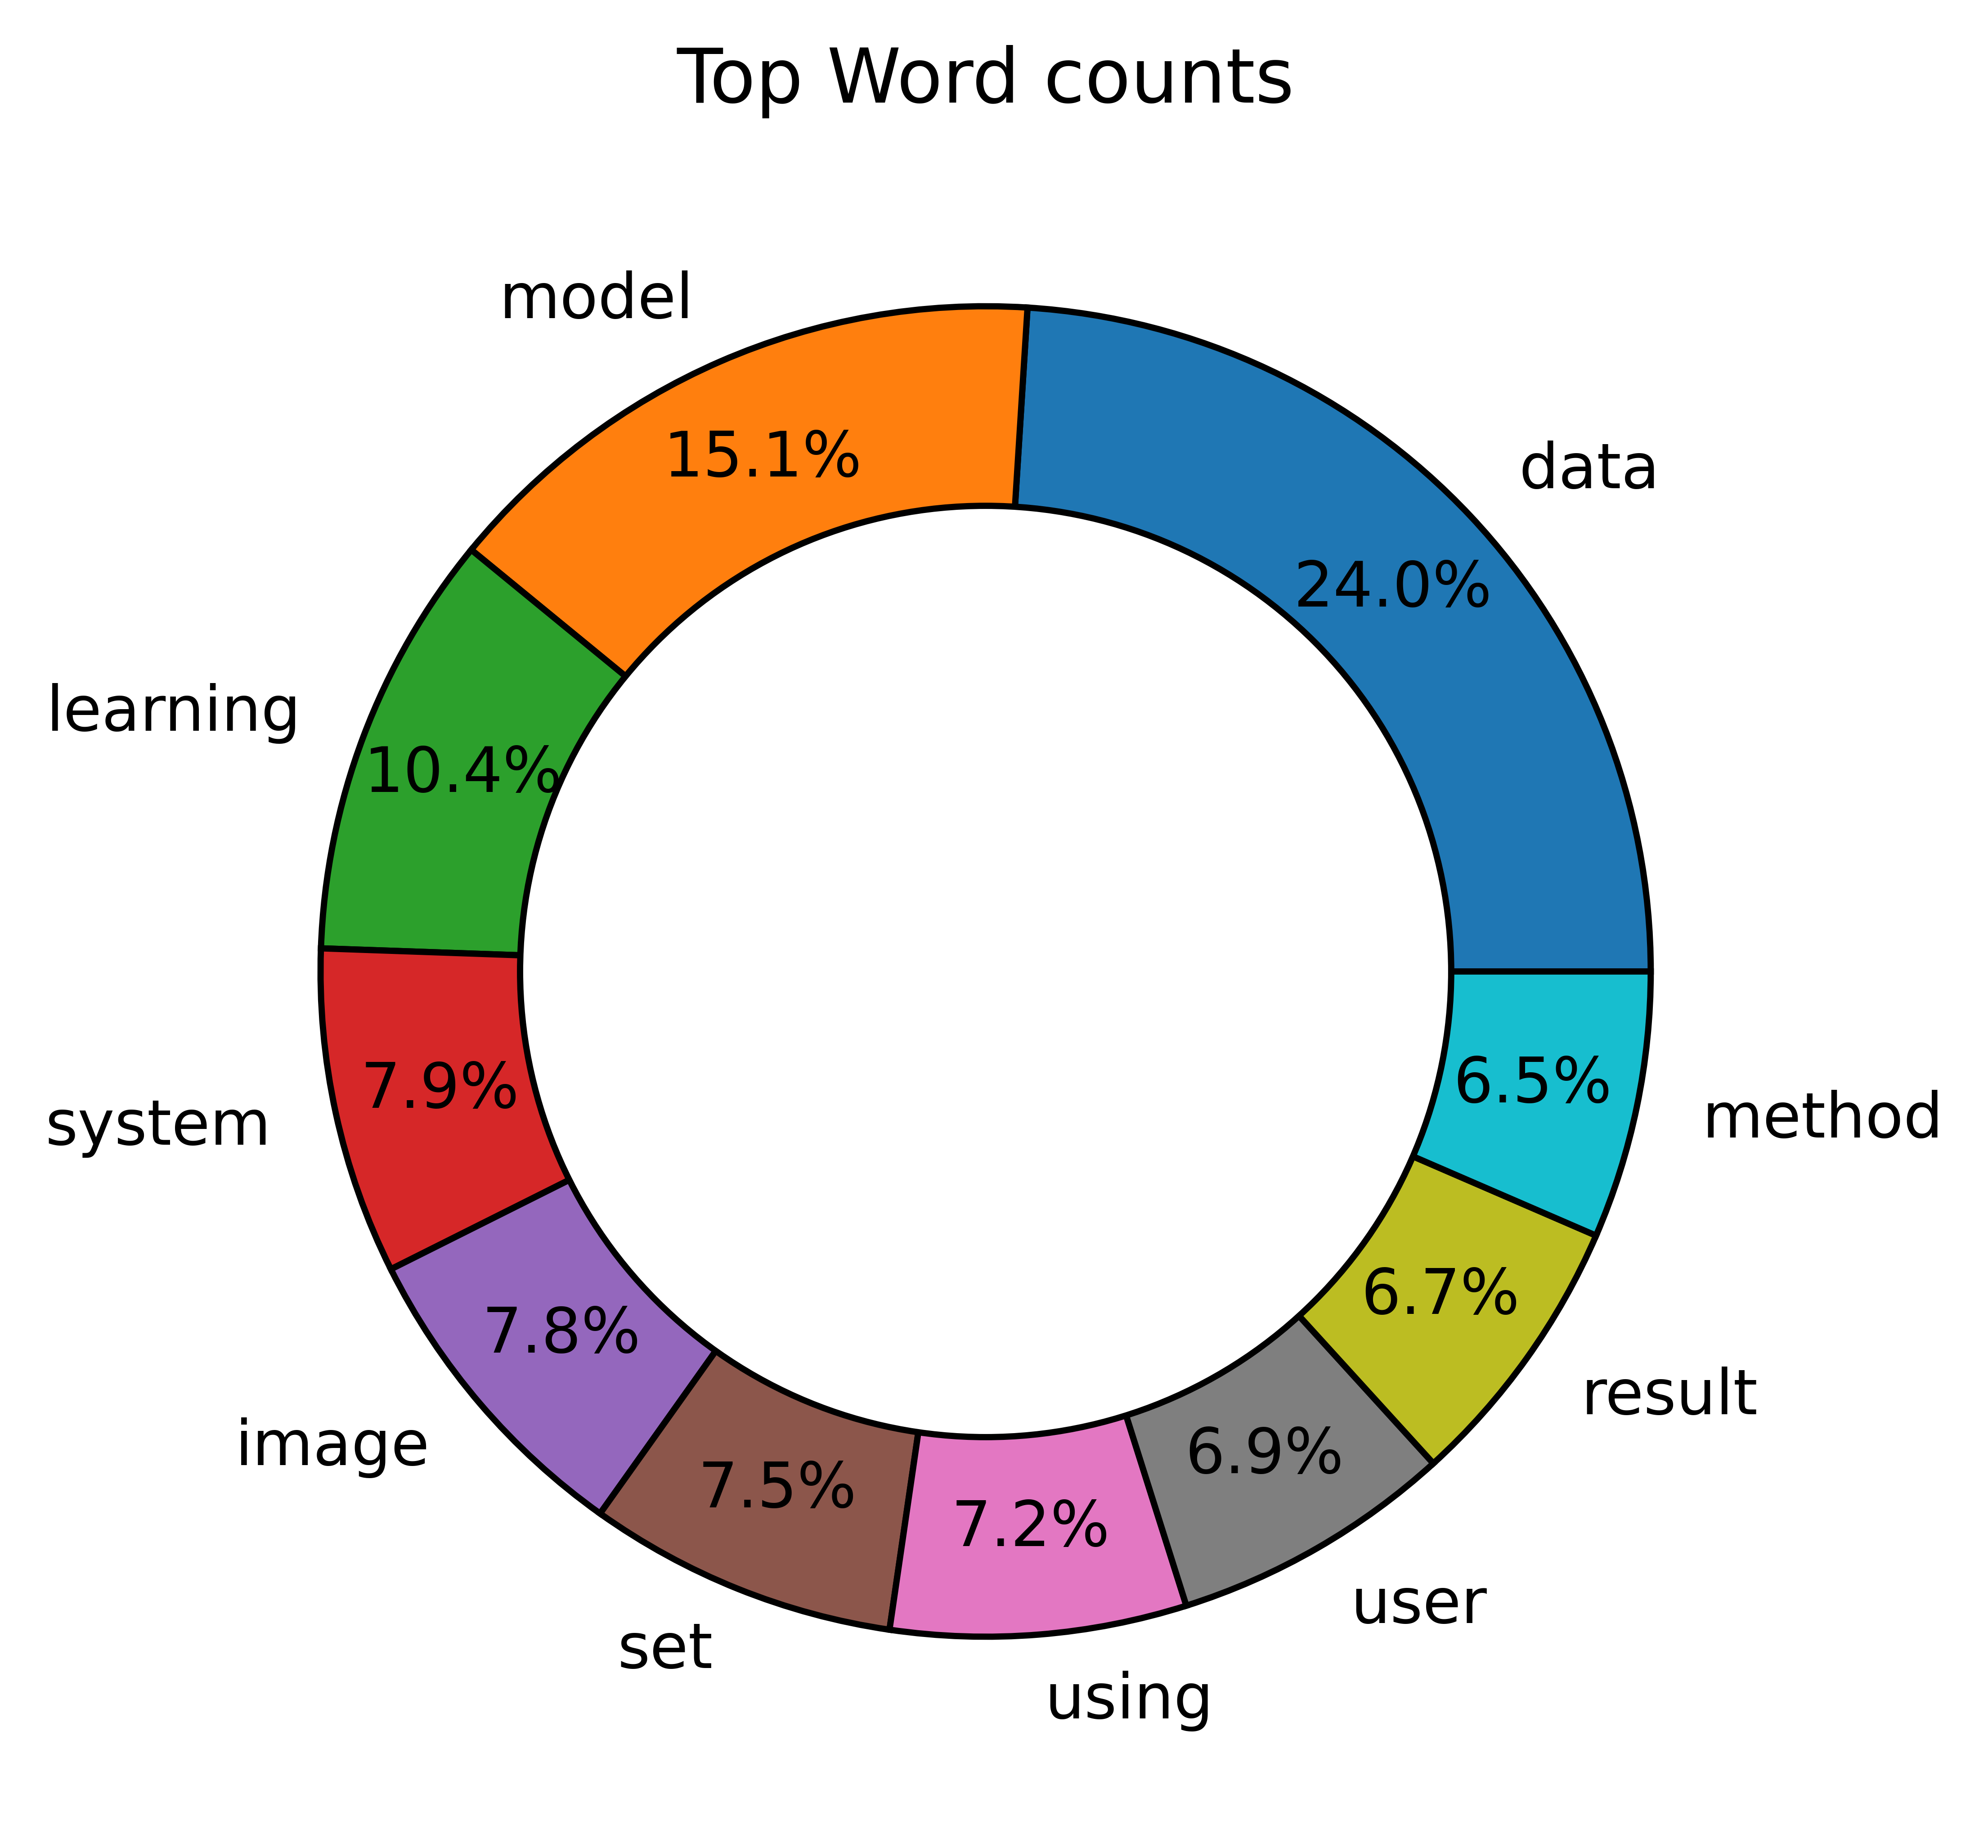

In [10]:
plt.rcParams['figure.dpi']=1000
pie(highest_count,0,1)